# Description of iris data
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with <b>50 samples</b> each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
-  Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
data = pd.read_csv('../input/Iris.csv')

# First and last five observations or row

In [2]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail(5)

### Classes in Species

In [ ]:
# Our target is 'species' So need to check how many of them
print("Species")
print(data['Species'].unique())

### Description 

In [ ]:
data.describe()

### Data Classes from original dataset

In [ ]:
import seaborn as sns
sns.FacetGrid(data, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

plt.show()



### Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)

In [3]:
# Preprocessing
# Let Separate Features and Target for machine Learning
# Step1 


features = list(data.columns[1:5])            # SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
target = data.columns[5]                      # Species

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = data.iloc[:,1:5]                          # slicing: all rows and 1 to 4 cols

# store response vector in "y"
y = data.iloc[:,5]                            # slicing: all rows and 5th col


print(y.shape)
print(X.shape)

Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Target: Species
(150,)
(150, 4)


### Converting Response Variable 'Species' to numbers to train model and add column

In [8]:
# Read more: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

# new col
data['EncodedSpecies'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
data.tail(10)

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Response variable after encoding: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,EncodedSpecies
140,141,6.7,3.1,5.6,2.4,Iris-virginica,2
141,142,6.9,3.1,5.1,2.3,Iris-virginica,2
142,143,5.8,2.7,5.1,1.9,Iris-virginica,2
143,144,6.8,3.2,5.9,2.3,Iris-virginica,2
144,145,6.7,3.3,5.7,2.5,Iris-virginica,2
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2
149,150,5.9,3.0,5.1,1.8,Iris-virginica,2


### Classification Models

### 1: K-nearest neighbors (KNN) classification
- Pick a value for K.
- Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
- Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### KNN Model

In [9]:
#Step2: Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Prediction for some feature values: 3, 5, 4, 2 

In [10]:
#Step3: Prediction for new observation
value = knn.predict([[3, 5, 4, 2]])
print('prediction value:',value)

print('Predicted Class' , data.loc[data['EncodedSpecies'] == 2, 'Species'].values[0])
#data.loc[data['EncodedSpecies'] == 2, 'Species'].values[0]

prediction value: [2]
Predicted Class Iris-virginica


In [11]:
# more predictions for other rows

X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]                        # Consider them as two new rows of input features in X
knn.predict(X_new)

array([2, 1])

### KNN for K=5

In [12]:
# Different value of K 
# instantiate the model (using the value K=5)

knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[1 1]


### How to check the best value for K?

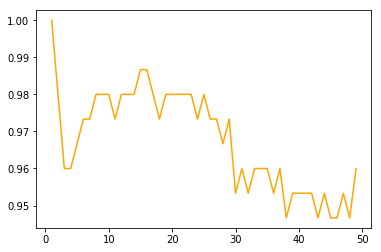

In [13]:
# For an optimal value of K for KNN

from sklearn import metrics
v=[]




k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Orange',)
plt.show()


# Logistic Regression

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in column: [3, 5, 4, 2]
logreg.predict([[3, 5, 4, 2]]) # Col vector # See previous result


y_pred = logreg.predict(X)

print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Classification accuracy #1:

In [15]:
# 1 KNN ACCURACY

# compute classification accuracy for the KNN model
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.9666666666666667


In [16]:
# 2 
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


# Evaluation procedure #2: Train/test split

In [17]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [18]:
print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


# Logistic Regression Model with Train Test split

In [19]:
logres = LogisticRegression()
logres.fit(X_train,y_train) # train data


# predict from test
log_pred = logres.predict(X_test)

# check accuracy
import sklearn.metrics as mt
mt.accuracy_score(log_pred,y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.95

# KNN with Train Test

In [ ]:

from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()


In [ ]:
print('from above the best value is near:',10)

In [20]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.9833333333333333